# 3.1 - Ingenieria de caracteristicas


**Regresion Lineal . Ecuacion de la recta**

$$y = m·x+b$$

In [1]:
import pandas as pd
import numpy as np
import pylab as plt

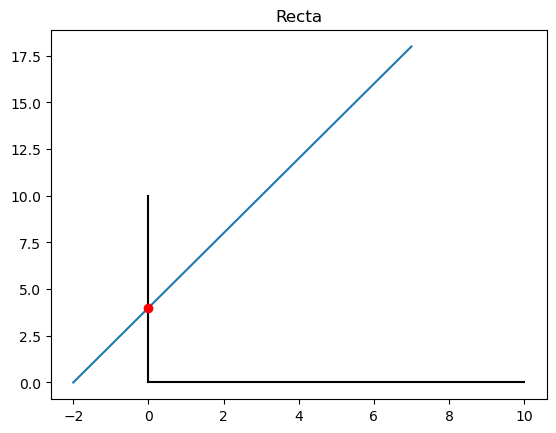

In [2]:
x=[i for i in range(-2, 8)]

m=2
b=4

y=[m*x+b for x in x]

plt.plot(x, y)
plt.plot([0,0], [0,10], color='black')
plt.plot([0,10], [0,0], color='black')
plt.plot(0, b, 'ro')
plt.title('Recta');

**Generalizacion de la ecuacion de la recta**

$$y=\beta_0+\beta_1x_1+\beta_2x_2+\beta_3x_3+\ldots+\beta_nx_n$$

El objetivo de la regresion lineal es obtener los $\beta$:
+ Algebraicamente: $\beta = (X^{T}X)^{-1}X^{T}Y$
+ Minimos cuadrados

In [3]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

import warnings
warnings.filterwarnings('ignore')

In [4]:
auto = pd.read_csv('../data/auto-mpg.csv')

auto.head()

,mpg,cylinders,displacement,horse_power,weight,acceleration,model_year,car_name
0,18.0,8,307.0,130.0,3504,12.0,70,"\t""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693,11.5,70,"\t""buick skylark 320"""
2,18.0,8,318.0,150.0,3436,11.0,70,"\t""plymouth satellite"""
3,16.0,8,304.0,150.0,3433,12.0,70,"\t""amc rebel sst"""
4,17.0,8,302.0,140.0,3449,10.5,70,"\t""ford torino"""


In [5]:
x = sm.add_constant(auto.acceleration)

y = auto.mpg

modelo = sm.OLS(y, x).fit()

In [6]:
y_pred = modelo.predict(x)

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     84.96
Date:                Wed, 23 Aug 2023   Prob (F-statistic):           1.82e-18
Time:                        10:44:14   Log-Likelihood:                -1343.9
No. Observations:                 398   AIC:                             2692.
Df Residuals:                     396   BIC:                             2700.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            4.9698      2.043      2.432      0.015       0.953       8.987
acceleration     1.1912      0.129      9.217      0.000       0.937       1.445
==============================================================================
Omnibus:                       17.459   Durbin-Watson:                   0.677
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.214
Skew:                           0.497   Prob(JB):                     0.000111
Kurtosis:                       2.670   Cond. No.                         91.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

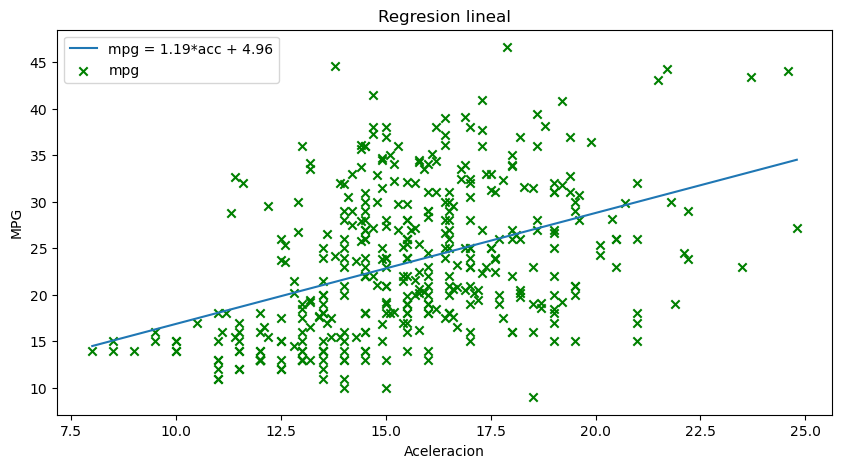

In [7]:
# plot

x=np.linspace(auto.acceleration.min(), auto.acceleration.max(), 50)

y=1.1912*x + 4.9698

plt.figure(figsize=(10, 5))

# la recta
plt.plot(x, y, label='mpg = 1.19*acc + 4.96')


# datos
plt.scatter(auto.acceleration, auto.mpg, marker='x', c='g', label='mpg')


plt.title('Regresion lineal')
plt.xlabel('Aceleracion')
plt.ylabel('MPG')
plt.legend()
plt.show();

In [8]:
# varias variables

x=sm.add_constant(auto[[
    
    #'acceleration',
    #'cylinders',
    'weight',
    #'horse_power',
    'model_year',
    #'displacement'
    
]].apply(lambda x: x.fillna(x.mean()))

)

y=auto.mpg


modelo=sm.OLS(y, x).fit()

pred=modelo.predict(x)

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     830.4
Date:                Wed, 23 Aug 2023   Prob (F-statistic):          3.26e-142
Time:                        10:44:14   Log-Likelihood:                -1054.3
No. Observations:                 398   AIC:                             2115.
Df Residuals:                     395   BIC:                             2127.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -14.1980      3.968     -3.578      0.000     -21.998      -6.398
weight        -0.0067      0.000    -31.161      0.000      -0.007      -0.006
model_year     0.7566      0.049     15.447      0.000       0.660       0.853
==============================================================================
Omnibus:                       41.827   Durbin-Watson:                   1.216
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.734
Skew:                           0.665   Prob(JB):                     1.19e-15
Kurtosis:                       4.541   Cond. No.                     7.12e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.12e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
x.model_year.unique()

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82])

**los coeficientes, son los pesos de las caracteristicas**

In [10]:
from sklearn.linear_model import LinearRegression as LinReg

auto2=auto.dropna()

X=auto2.drop('mpg', axis=1)._get_numeric_data()

y=auto2.mpg

In [11]:
modelo = LinReg()

modelo.fit(X, y)

LinearRegression()

In [12]:
modelo.intercept_   # beta0, ordenada en el origen

-14.53525048050604

In [13]:
dict(zip(X.columns, modelo.coef_))

{'cylinders': -0.3298590890739662,
 'displacement': 0.007678430243919012,
 'horse_power': -0.00039135557376073177,
 'weight': -0.006794617913375033,
 'acceleration': 0.08527324694722949,
 'model_year': 0.7533671797501017}

In [14]:
X.head()

,cylinders,displacement,horse_power,weight,acceleration,model_year
0,8,307.0,130.0,3504,12.0,70
1,8,350.0,165.0,3693,11.5,70
2,8,318.0,150.0,3436,11.0,70
3,8,304.0,150.0,3433,12.0,70
4,8,302.0,140.0,3449,10.5,70


In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
X_norm=StandardScaler().fit_transform(X)  # normalizacion N(0,1)

linreg=LinReg().fit(X_norm, y)

In [17]:
dict(zip(X.columns, linreg.coef_))

{'cylinders': -0.5619499609544034,
 'displacement': 0.8024761554073674,
 'horse_power': -0.015044503769495673,
 'weight': -5.763999713309913,
 'acceleration': 0.2349570366233119,
 'model_year': 2.7716641465252847}

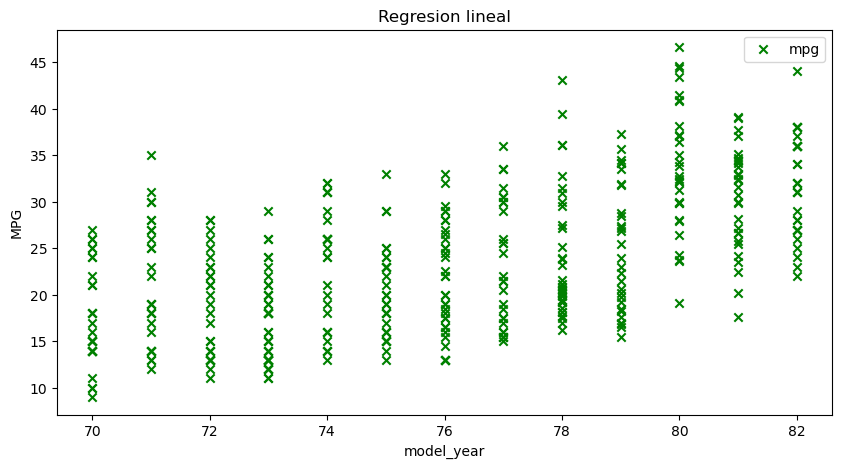

In [18]:
# plot

x=np.linspace(auto.model_year.min(), auto.model_year.max(), 50)

plt.figure(figsize=(10, 5))


# datos
plt.scatter(auto.model_year, auto.mpg, marker='x', c='g', label='mpg')

plt.title('Regresion lineal')
plt.xlabel('model_year')
plt.ylabel('MPG')
plt.legend()
plt.show();

## Regresion Logistica


$$y=\frac{1}{1 + e^{-(\beta_0+\beta_1x_1+\beta_2x_2+\beta_3x_3+\ldots+\beta_nx_n)}}$$

El objetivo de la regresion logistica es obtener los $\beta$.

In [19]:
iris=pd.read_csv('../data/iris.csv')

iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [20]:
iris.variety.unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

In [21]:
dictio = {'Setosa': 0, 'Versicolor': 1, 'Virginica': 2}

iris.variety = iris.variety.apply(lambda x: dictio[x])

iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [22]:
X = iris.drop('variety', axis=1)

y = iris.variety

In [23]:
from sklearn.linear_model import LogisticRegression as LogReg

In [24]:
modelo = LogReg()

modelo.fit(X, y)

LogisticRegression()

In [25]:
modelo.intercept_

array([  9.8393878 ,   2.21494388, -12.05433168])

In [26]:
dict(zip(X.columns, modelo.coef_.T))

{'sepal.length': array([-0.41824913,  0.5310752 , -0.11282607]),
 'sepal.width': array([ 0.96651916, -0.3145156 , -0.65200356]),
 'petal.length': array([-2.52137228, -0.19936908,  2.72074136]),
 'petal.width': array([-1.08404515, -0.94913332,  2.03317847])}

In [27]:
{'Setosa': dict(zip(X.columns, modelo.coef_[0])),
 
'Versicolor': dict(zip(X.columns, modelo.coef_[1])),
 
'Virginica': dict(zip(X.columns, modelo.coef_[2]))}

{'Setosa': {'sepal.length': -0.4182491289410818,
  'sepal.width': 0.9665191567805256,
  'petal.length': -2.5213722786847885,
  'petal.width': -1.0840451513741831},
 'Versicolor': {'sepal.length': 0.5310751964645506,
  'sepal.width': -0.3145155981420289,
  'petal.length': -0.19936908211098858,
  'petal.width': -0.9491333160565789},
 'Virginica': {'sepal.length': -0.11282606752345008,
  'sepal.width': -0.6520035586385132,
  'petal.length': 2.7207413607957776,
  'petal.width': 2.0331784674307536}}

## Decision Tree - Random Forest

In [28]:
from sklearn.tree import DecisionTreeRegressor as DTR

In [29]:
from sklearn.ensemble import RandomForestRegressor as RFR

In [30]:
# dtr

X = auto2.drop(columns=['mpg', 'car_name'])

y = auto2.mpg

In [31]:
dtr = DTR().fit(X, y)

In [32]:
sum(dtr.feature_importances_)

1.0000000000000002

In [33]:
dict(zip(X.columns, dtr.feature_importances_*100))

{'cylinders': 0.3581228359275628,
 'displacement': 59.73678133166157,
 'horse_power': 17.11967620706476,
 'weight': 8.168769842971384,
 'acceleration': 3.466560509763618,
 'model_year': 11.15008927261111}

In [34]:
X_norm = StandardScaler().fit_transform(X)

dtr = DTR().fit(X_norm, y)

dict(zip(X.columns, dtr.feature_importances_*100))

{'cylinders': 0.07322447674269045,
 'displacement': 60.01235376970207,
 'horse_power': 17.36986742988495,
 'weight': 7.94762560681167,
 'acceleration': 3.440377423450373,
 'model_year': 11.156551293408253}

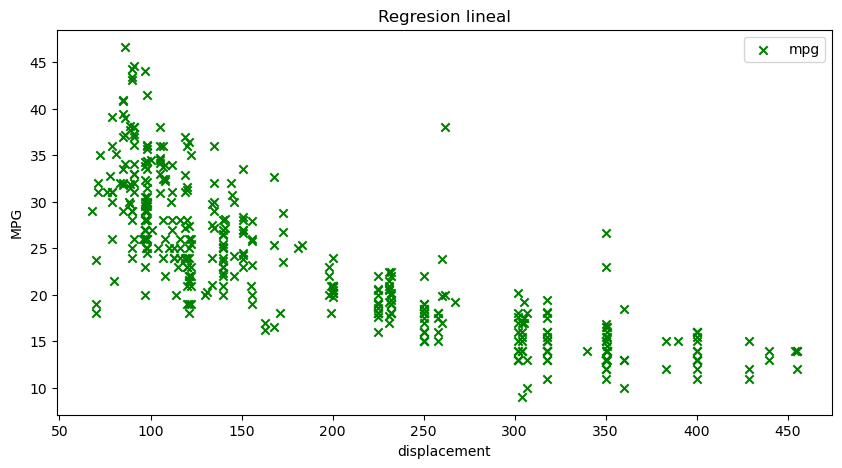

In [35]:
# plot
plt.figure(figsize=(10, 5))


# datos
plt.scatter(auto.displacement, auto.mpg, marker='x', c='g', label='mpg')

plt.title('Regresion lineal')
plt.xlabel('displacement')
plt.ylabel('MPG')
plt.legend()
plt.show();

In [36]:
linreg.score(X_norm, y)

0.8092552890383932

In [37]:
dtr.score(X_norm, y)

1.0

In [38]:
# rfr

rfr = RFR(n_estimators=2000).fit(X_norm, y)  # 2000 arboles

In [39]:
dict(zip(X.columns, rfr.feature_importances_*100))    # de media entre los 2000

{'cylinders': 17.75922468422342,
 'displacement': 34.087962559925316,
 'horse_power': 12.33096119295034,
 'weight': 20.71529885536585,
 'acceleration': 2.979092040248267,
 'model_year': 12.127460667286808}

In [40]:
sum(rfr.feature_importances_)

1.0

In [41]:
len(rfr.estimators_)

2000

In [42]:
rfr.estimators_[0].feature_importances_

array([0.        , 0.02617711, 0.21193731, 0.61532403, 0.02978801,
       0.11677355])

In [43]:
dict(zip(X.columns, rfr.estimators_[0].feature_importances_*100))    # de media entre los 2000

{'cylinders': 0.0,
 'displacement': 2.6177108437371626,
 'horse_power': 21.193730766756836,
 'weight': 61.53240301376095,
 'acceleration': 2.9788005445205883,
 'model_year': 11.67735483122447}

In [44]:
from sklearn.model_selection import train_test_split as tts

from sklearn.metrics import mean_squared_error as mse

In [45]:
X_train, X_test, y_train, y_test = tts(X_norm, y, train_size=0.8)

In [46]:
# dtr

dtr = DTR()

dtr.fit(X_train, y_train)

y_pred = dtr.predict(X_test)

mse(y_test, y_pred, squared=False)  # rmse


4.062860500071098

In [47]:
dtr.score(X_test, y_test)   #r2

0.7400911136674435

In [48]:
# rfr

rfr = RFR(n_estimators=2000)

rfr.fit(X_train, y_train)

y_pred = rfr.predict(X_test)

mse(y_test, y_pred, squared=False)  # rmse


2.876121235302532

In [49]:
rfr.score(X_train, y_train)   #r2 train

0.9826675704467961

In [50]:
rfr.score(X_test, y_test)   #r2 test

0.8697518139004222

In [51]:
y_test.mean()

23.146835443037972

In [52]:
X['random'] = np.random.normal(size=len(X))

X.head()

,cylinders,displacement,horse_power,weight,acceleration,model_year,random
0,8,307.0,130.0,3504,12.0,70,0.334062
1,8,350.0,165.0,3693,11.5,70,-0.436733
2,8,318.0,150.0,3436,11.0,70,-0.595868
3,8,304.0,150.0,3433,12.0,70,1.413191
4,8,302.0,140.0,3449,10.5,70,-0.369580


In [53]:
X_norm=StandardScaler().fit_transform(X)

dtr = DTR().fit(X_norm, y)

dict(zip(X.columns, dtr.feature_importances_*100))    

{'cylinders': 0.38670226915201844,
 'displacement': 59.63051268098146,
 'horse_power': 17.09423605425414,
 'weight': 7.511247043308293,
 'acceleration': 2.435728987628328,
 'model_year': 10.085402744275324,
 'random': 2.856170220400436}

In [54]:
X_nueva = X.drop(columns=['cylinders', 'acceleration', 'random'])

X_norm=StandardScaler().fit_transform(X_nueva)

X_train, X_test, y_train, y_test = tts(X_norm, y, train_size=0.8)

# rfr

rfr = RFR(n_estimators=2000)

rfr.fit(X_train, y_train)

y_pred = rfr.predict(X_test)

mse(y_test, y_pred, squared=False)  # rmse


2.5189495075177573

In [55]:
dict(zip(X_nueva.columns, rfr.feature_importances_*100))    

{'displacement': 47.56669459099825,
 'horse_power': 13.877463622083555,
 'weight': 24.76484942501051,
 'model_year': 13.790992361907678}

In [56]:
rfr.score(X_train, y_train)   #r2 train

0.9825860466501174

In [57]:
rfr.score(X_test, y_test)   #r2 test

0.9050714924771989

## Relleno Nan

In [58]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horse_power   392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   car_name      398 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 25.0+ KB


In [59]:
train = auto[auto.horse_power.notna()]  # selecciono lo NO nulo

In [60]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horse_power   392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   car_name      392 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 27.6+ KB


In [61]:
X = train.drop(columns=['horse_power', 'car_name'])

y = train.horse_power

In [62]:
rfr = RFR()

rfr.fit(X, y)

RandomForestRegressor()

In [63]:
test = auto[auto.horse_power.isna()]  # selecciono lo nulo

test

,mpg,cylinders,displacement,horse_power,weight,acceleration,model_year,car_name
32,25.0,4,98.0,NaN,2046,19.0,71,"\t""ford pinto"""
126,21.0,6,200.0,NaN,2875,17.0,74,"\t""ford maverick"""
330,40.9,4,85.0,NaN,1835,17.3,80,"\t""renault lecar deluxe"""
336,23.6,4,140.0,NaN,2905,14.3,80,"\t""ford mustang cobra"""
354,34.5,4,100.0,NaN,2320,15.8,81,"\t""renault 18i"""
374,23.0,4,151.0,NaN,3035,20.5,82,"\t""amc concord dl"""


In [64]:
X_test = test.drop(columns=['horse_power', 'car_name'])

X_test

,mpg,cylinders,displacement,weight,acceleration,model_year
32,25.0,4,98.0,2046,19.0,71
126,21.0,6,200.0,2875,17.0,74
330,40.9,4,85.0,1835,17.3,80
336,23.6,4,140.0,2905,14.3,80
354,34.5,4,100.0,2320,15.8,81
374,23.0,4,151.0,3035,20.5,82


In [65]:
y_pred = rfr.predict(X_test)

y_pred

array([ 69.09,  89.51,  60.35, 100.87,  78.07,  84.87])

In [66]:
auto.loc[auto[auto.horse_power.isna()].index, 'horse_power'] = y_pred

In [67]:
auto[auto.horse_power.isna()]

,mpg,cylinders,displacement,horse_power,weight,acceleration,model_year,car_name


In [68]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horse_power   398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   car_name      398 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 25.0+ KB
